# Credit status and characteristics of some firms in the UK from 2019 and 2020

Load necessary libraries

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline        

Loading dataset

In [47]:
import pandas as pd
data_all= pd.read_csv("EM.csv")

In [48]:
data_all

,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.000,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.000,2582700.000,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.000,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.000,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.000,553800.000,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,31,Caution,10.8,846.0,38.0,Yes,NaN,51.344614,NaN,92.855191,...,31.868,36.600,NaN,NaN,NaN,NaN,1.778772,1.566767,30.805815,NaN
8172,19,High Risk,10.6,NaN,21.0,Unconfirmed,NaN,-73.025732,NaN,NaN,...,NaN,-0.823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8173,21,Caution,10.6,NaN,29.0,Yes,NaN,94.231524,NaN,NaN,...,92.061,NaN,NaN,NaN,NaN,66.903454,0.962697,1.445911,NaN,NaN
8174,21,Caution,10.6,NaN,21.0,Yes,NaN,-100.000000,NaN,NaN,...,-13.702,NaN,NaN,NaN,NaN,16.189985,NaN,1.000000,NaN,NaN


In [49]:
data_all.head()

,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


## Exploratory Data Analysis (EDA)

Showing the summary statistics

In [50]:
data_all.describe()

,Creditscore,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
count,8176.000000,8107.000000,6.771000e+03,7740.000000,2981.000000,6773.000000,2443.000000,5456.000000,2913.000000,6601.000000,...,3.854000e+03,7.707000e+03,2020.000000,5075.000000,1676.000000,4552.000000,3018.000000,6724.000000,1385.000000,3075.000000
mean,57.300514,5.222030,5.292997e+05,60.431912,27.903380,22.988502,65.895390,51.214527,51.135009,38.020029,...,8.513789e+03,1.070198e+04,-536.391740,-489.853105,44.991604,40.828643,4.137871,3.331513,35.770585,36.916356
std,29.730987,4.402007,2.983264e+06,29.744458,122.359699,105.484711,160.958270,142.652371,159.209969,141.429108,...,1.267379e+05,1.020021e+05,5486.814104,4972.515365,33.273956,30.629930,9.685434,7.609185,28.776699,28.611943
min,15.000000,0.900000,5.000000e+02,12.000000,-986.769231,-912.765957,-986.769231,-962.567310,-986.769231,-982.024945,...,-6.370710e+05,-6.797920e+05,-138300.000000,-170400.000000,-92.670157,-96.103896,0.000210,0.000002,0.000089,0.000056
25%,29.000000,0.900000,5.000000e+02,31.000000,0.258019,0.058547,5.022592,4.357923,1.600826,1.272559,...,5.350000e-01,8.805000e-01,-111.152750,-180.526000,18.999768,18.746543,0.978612,0.918068,10.216751,11.334873
50%,45.000000,4.500000,1.543000e+04,57.000000,8.895044,6.909952,25.345375,19.642117,18.210079,14.065986,...,1.298550e+01,8.379200e+01,-6.967000,-17.631000,35.722637,32.407668,1.536642,1.411439,29.856705,31.473657
75%,90.000000,10.600000,2.342970e+05,92.000000,44.012601,24.904707,95.714174,64.367905,82.183945,51.639653,...,8.594805e+02,3.791737e+03,-0.626750,-0.558500,73.842839,59.381827,3.223637,2.763619,56.823166,59.481722
max,99.000000,19.400000,5.000000e+07,99.000000,815.362798,977.934426,991.539401,996.705178,991.539401,990.810811,...,4.838900e+06,4.862100e+06,15584.000000,36666.000000,100.000000,100.000000,97.166667,99.593883,100.000000,100.000000


In [51]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Creditscore                      8176 non-null   int64  
 1   Creditscoreindicator             8176 non-null   object 
 2   Likelihoodoffailure              8107 non-null   float64
 3   CreditlimitGBPGBP                6771 non-null   float64
 4   Previouscreditscore              7740 non-null   float64
 5   SMEindicator                     8176 non-null   object 
 6   ReturnonTotalAssets2020          2981 non-null   float64
 7   ReturnonTotalAssets2019          6773 non-null   float64
 8   ReturnonShareholdersFunds2020    2443 non-null   float64
 9   ReturnonShareholdersFunds2019    5456 non-null   float64
 10  ReturnonCapitalEmployed2020      2913 non-null   float64
 11  ReturnonCapitalEmployed2019      6601 non-null   float64
 12  TurnoverthGBP2020   

#### EDA Analysis of the two features

Histogram of 'Credit Score' grouped by 'Creditscoreindicator'

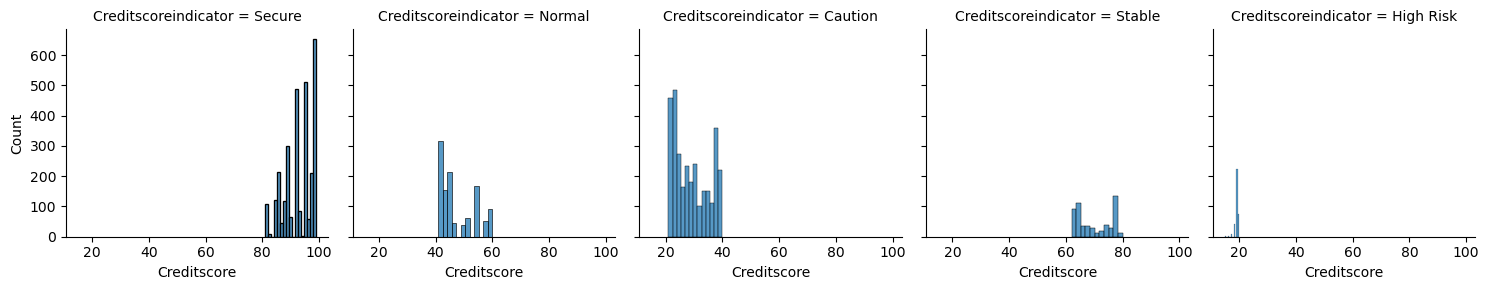

In [52]:
chart = sns.FacetGrid(data_all, col='Creditscoreindicator')  
chart.map(sns.histplot, 'Creditscore') 

Scatter plot between 'Creditscore' and 'ReturnonCapitalEmployed2020' grouped by 'SMEindicator'

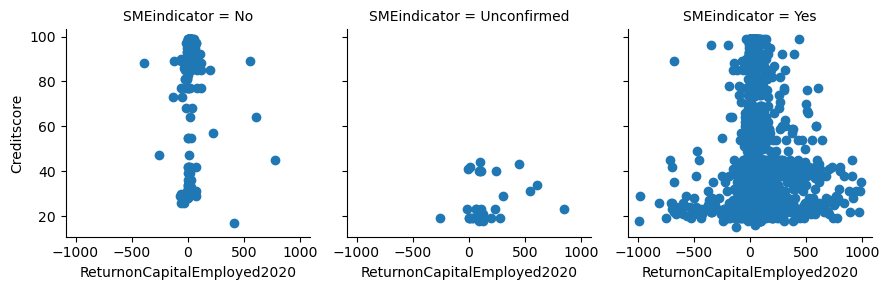

In [53]:
chart = sns.FacetGrid(data_all, col='SMEindicator')  
chart.map(plt.scatter, 'ReturnonCapitalEmployed2020', 'Creditscore')  

Scatter plot and Line plot between 'Creditscore' and 'Likelihoodoffailure'

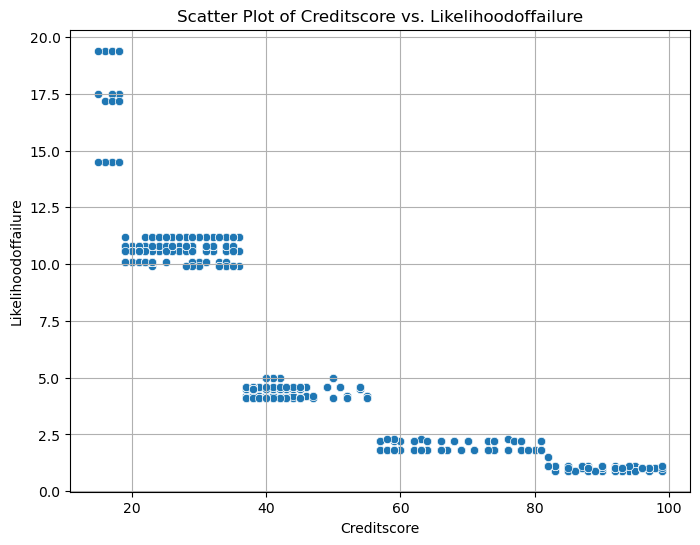

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_all, x='Creditscore', y='Likelihoodoffailure')
plt.title('Scatter Plot of Creditscore vs. Likelihoodoffailure')
plt.xlabel('Creditscore')
plt.ylabel('Likelihoodoffailure')
plt.grid(True)
plt.show()

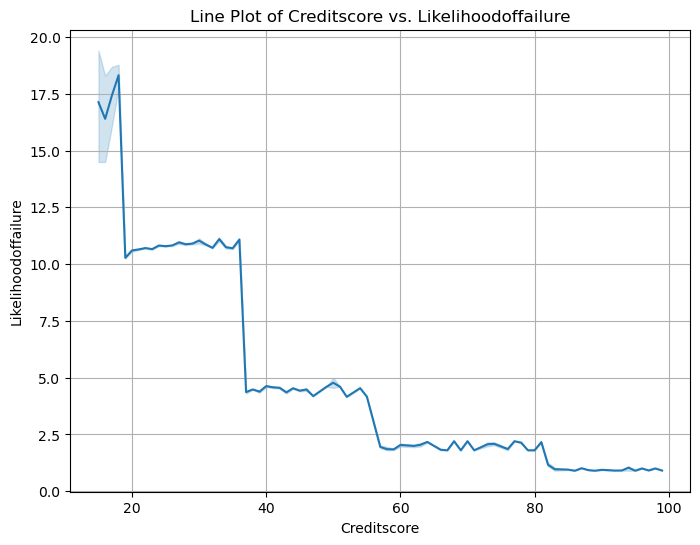

In [55]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=data_all, x='Creditscore', y='Likelihoodoffailure')
plt.title('Line Plot of Creditscore vs. Likelihoodoffailure')
plt.xlabel('Creditscore')
plt.ylabel('Likelihoodoffailure')
plt.grid(True)
plt.show()

Scatter plot between 'Creditscore' and 'Likelihoodoffailure' grouped by 'Creditscoreindicator'

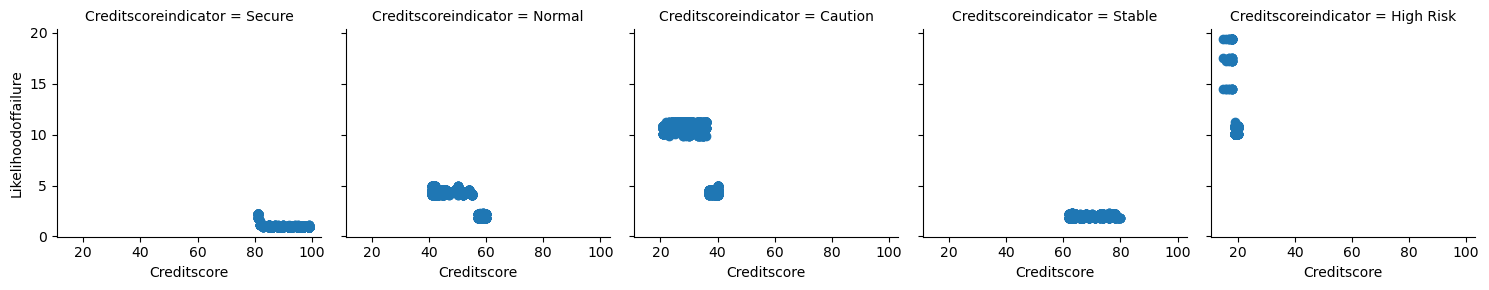

In [56]:
chart = sns.FacetGrid(data_all, col='Creditscoreindicator')  
chart.map(plt.scatter, 'Creditscore', 'Likelihoodoffailure')
plt.show()

Scatter plot between 'Creditscore' and 'CreditlimitGBP'

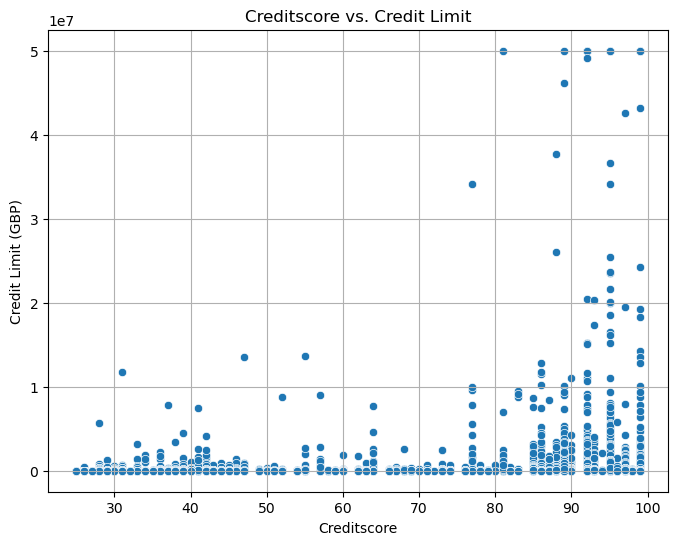

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_all, x='Creditscore', y='CreditlimitGBPGBP')
plt.title('Creditscore vs. Credit Limit')
plt.xlabel('Creditscore')
plt.ylabel('Credit Limit (GBP)')
plt.grid(True)
plt.show()

'Creditscore' with 'EBITDA' and 'Numberofemployees'

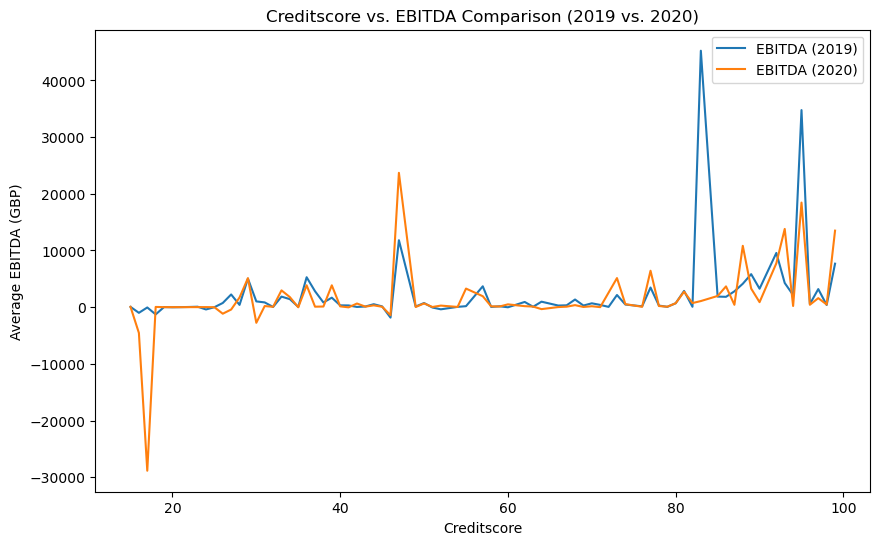

In [58]:
# Calculate the average EBITDA for each Creditscore for 2019
avg_ebitda_2019 = data_all.groupby('Creditscore')['EBITDAthGBP2019'].mean().reset_index()

# Calculate the average EBITDA for each Creditscore for 2020
avg_ebitda_2020 = data_all.groupby('Creditscore')['EBITDAthGBP2020'].mean().reset_index()

# Plot Creditscore vs. EBITDA for 2019
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_ebitda_2019, x='Creditscore', y='EBITDAthGBP2019', label='EBITDA (2019)')

# Plot Creditscore vs. EBITDA for 2020
sns.lineplot(data=avg_ebitda_2020, x='Creditscore', y='EBITDAthGBP2020', label='EBITDA (2020)')

# Add labels and title
plt.title('Creditscore vs. EBITDA Comparison (2019 vs. 2020)')
plt.xlabel('Creditscore')
plt.ylabel('Average EBITDA (GBP)')
plt.legend()
plt.show()

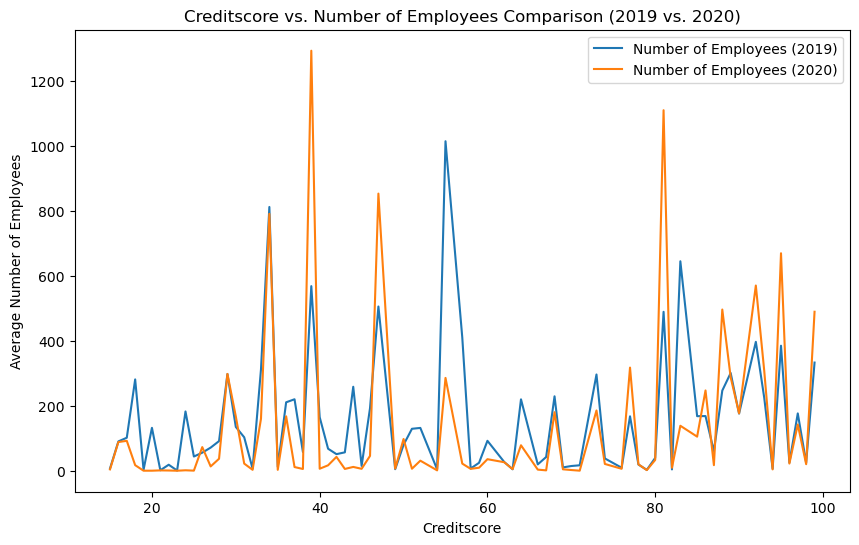

In [59]:
# Calculate the average Numberofemployees for each Creditscore for 2019
avg_employees_2019 = data_all.groupby('Creditscore')['Numberofemployees2019'].mean().reset_index()

# Calculate the average Numberofemployees for each Creditscore for 2020
avg_employees_2020 = data_all.groupby('Creditscore')['Numberofemployees2020'].mean().reset_index()

# Plot Creditscore vs. Numberofemployees for 2019
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_employees_2019, x='Creditscore', y='Numberofemployees2019', label='Number of Employees (2019)')

# Plot Creditscore vs. Numberofemployees for 2020
sns.lineplot(data=avg_employees_2020, x='Creditscore', y='Numberofemployees2020', label='Number of Employees (2020)')

# Add labels and title
plt.title('Creditscore vs. Number of Employees Comparison (2019 vs. 2020)')
plt.xlabel('Creditscore')
plt.ylabel('Average Number of Employees')
plt.legend()
plt.show()

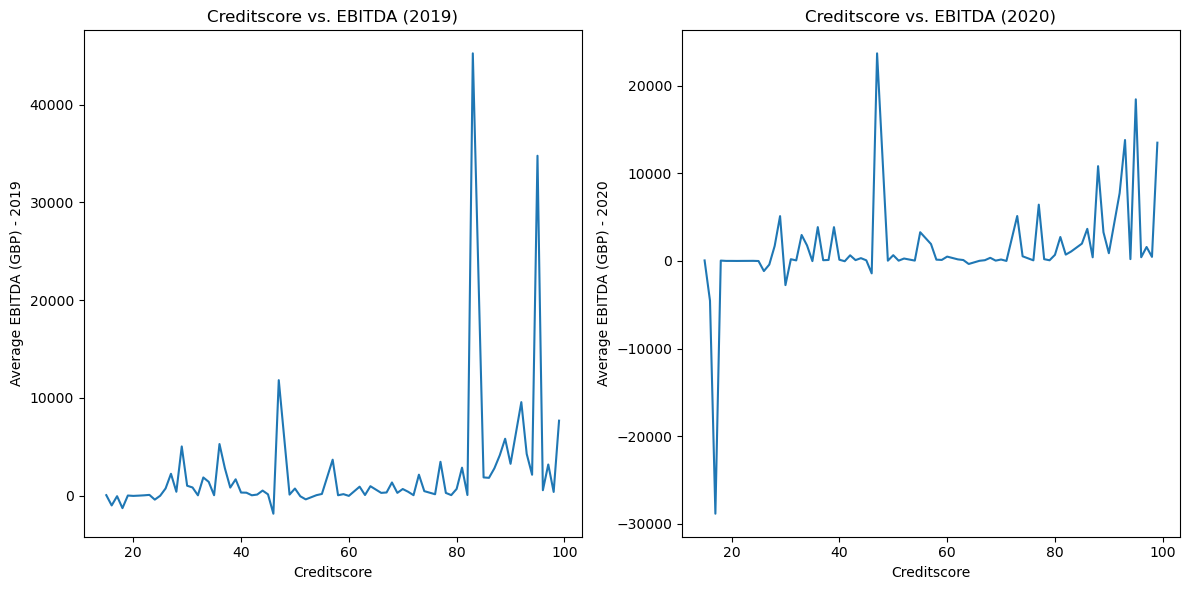

In [60]:
# Create subplots for EBITDA
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Creditscore vs. EBITDA for 2019
sns.lineplot(data=avg_ebitda_2019, x='Creditscore', y='EBITDAthGBP2019', ax=axes[0])
axes[0].set_title('Creditscore vs. EBITDA (2019)')
axes[0].set_xlabel('Creditscore')
axes[0].set_ylabel('Average EBITDA (GBP) - 2019')

# Plot Creditscore vs. EBITDA for 2020
sns.lineplot(data=avg_ebitda_2020, x='Creditscore', y='EBITDAthGBP2020', ax=axes[1])
axes[1].set_title('Creditscore vs. EBITDA (2020)')
axes[1].set_xlabel('Creditscore')
axes[1].set_ylabel('Average EBITDA (GBP) - 2020')

# Adjust layout
plt.tight_layout()
plt.show()

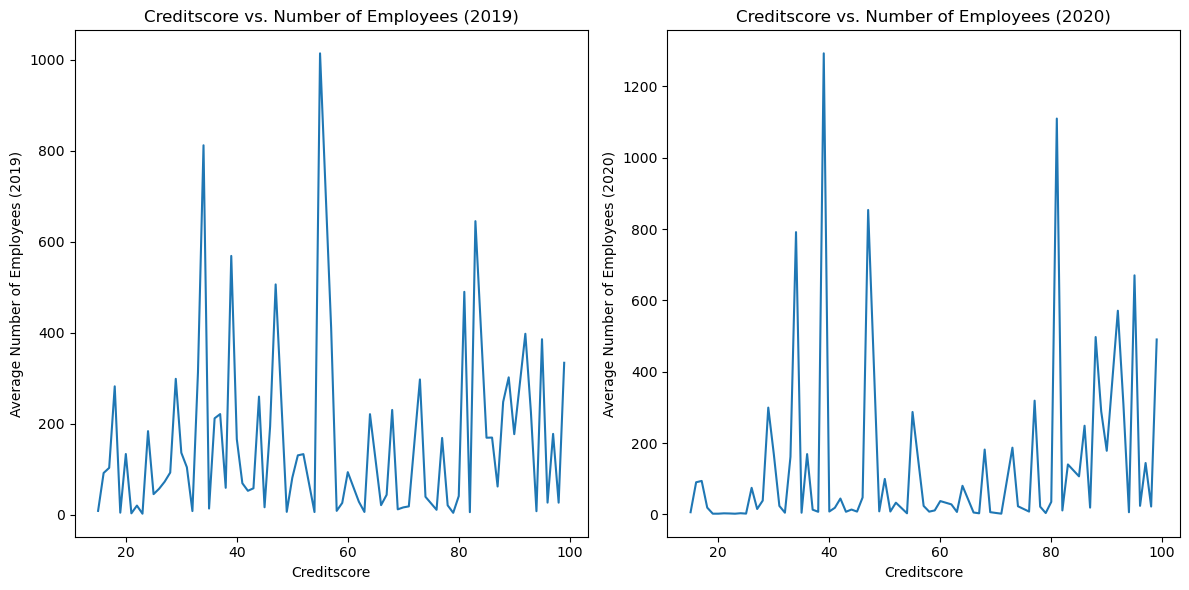

In [61]:
# Create subplots for Number of employees
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Creditscore vs. Number of employees for 2019
sns.lineplot(data=avg_employees_2019, x='Creditscore', y='Numberofemployees2019', ax=axes[0])
axes[0].set_title('Creditscore vs. Number of Employees (2019)')
axes[0].set_xlabel('Creditscore')
axes[0].set_ylabel('Average Number of Employees (2019)')

# Plot Creditscore vs. Number of employees for 2020
sns.lineplot(data=avg_employees_2020, x='Creditscore', y='Numberofemployees2020', ax=axes[1])
axes[1].set_title('Creditscore vs. Number of Employees (2020)')
axes[1].set_xlabel('Creditscore')
axes[1].set_ylabel('Average Number of Employees (2020)')

# Adjust layout
plt.tight_layout()
plt.show()

##### Creating new feature: 'CreditLevel'

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create 'CreditLevel' feature
mean_creditscore = data_all['Creditscore'].mean()
data_all['CreditLevel'] = (data_all['Creditscore'] > mean_creditscore).astype(int)

Dropping 'Creditscore' feature, as a binary variable 'CreditLevel' has been created for it

In [63]:
# Drop 'CreditScore' feature
data_all.drop(columns=['Creditscore'], inplace=True)

Setting the 'CreditLevel' as the target variable 'Y' and the remaining numerical data are 'X'

In [64]:
# Separate features (X) and target variable (Y)
X = data_all.drop(['CreditLevel'], axis=1)  # Drop 'CreditLevel' from features
Y = data_all['CreditLevel']                 # Assigning 'CreditLevel' as the target variable Y

In [65]:
X

,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,NaN,...,NaN,2110000.000,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,-0.175859,...,2713800.000,2582700.000,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,NaN,...,NaN,397247.000,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,NaN,...,NaN,168900.000,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,28.898498,...,441500.000,553800.000,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,Caution,10.8,846.0,38.0,Yes,NaN,51.344614,NaN,92.855191,NaN,...,31.868,36.600,NaN,NaN,NaN,NaN,1.778772,1.566767,30.805815,NaN
8172,High Risk,10.6,NaN,21.0,Unconfirmed,NaN,-73.025732,NaN,NaN,NaN,...,NaN,-0.823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8173,Caution,10.6,NaN,29.0,Yes,NaN,94.231524,NaN,NaN,NaN,...,92.061,NaN,NaN,NaN,NaN,66.903454,0.962697,1.445911,NaN,NaN
8174,Caution,10.6,NaN,21.0,Yes,NaN,-100.000000,NaN,NaN,NaN,...,-13.702,NaN,NaN,NaN,NaN,16.189985,NaN,1.000000,NaN,NaN


In [66]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
8171    0
8172    0
8173    0
8174    0
8175    1
Name: CreditLevel, Length: 8176, dtype: int32

##### Data preprocessing

Dropping non-numeric columns

In [67]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['float64', 'int64']).columns

# Print non-numeric columns
print("Non-numeric columns:")
print(non_numeric_cols)

Non-numeric columns:
Index(['Creditscoreindicator', 'SMEindicator'], dtype='object')


In [68]:
X = X.drop(columns=['Creditscoreindicator', 'SMEindicator'])

In [69]:
X

,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,0.9,50000000.0,95.0,NaN,5.614489,NaN,10.284360,NaN,8.326938,NaN,...,NaN,2110000.000,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,0.9,50000000.0,99.0,-0.130484,2.832746,-0.283735,7.000426,-0.175859,4.070147,6157500.0,...,2713800.000,2582700.000,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,0.9,16574000.0,99.0,NaN,3.817802,NaN,18.074145,NaN,15.152711,NaN,...,NaN,397247.000,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,0.9,5380000.0,92.0,NaN,-5.702719,NaN,-67.554766,NaN,-15.251972,NaN,...,NaN,168900.000,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,0.9,50000000.0,99.0,21.144665,26.910621,169.535674,130.534489,28.898498,45.933410,4266200.0,...,441500.000,553800.000,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,10.8,846.0,38.0,NaN,51.344614,NaN,92.855191,NaN,82.954989,NaN,...,31.868,36.600,NaN,NaN,NaN,NaN,1.778772,1.566767,30.805815,NaN
8172,10.6,NaN,21.0,NaN,-73.025732,NaN,NaN,NaN,-73.025732,NaN,...,NaN,-0.823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8173,10.6,NaN,29.0,NaN,94.231524,NaN,NaN,NaN,154.809464,NaN,...,92.061,NaN,NaN,NaN,NaN,66.903454,0.962697,1.445911,NaN,NaN
8174,10.6,NaN,21.0,NaN,-100.000000,NaN,NaN,NaN,NaN,NaN,...,-13.702,NaN,NaN,NaN,NaN,16.189985,NaN,1.000000,NaN,NaN


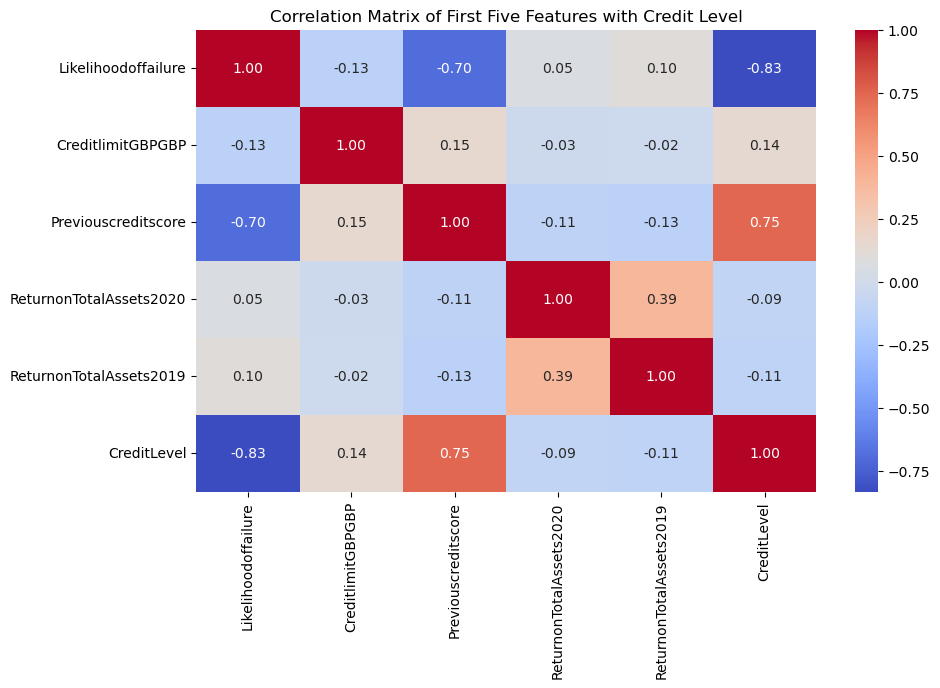

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate X and Y for correlation analysis
df_corr = pd.concat([X.iloc[:, :5], Y], axis=1)

# Generate correlation matrix
corr_matrix = df_corr.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of First Five Features with Credit Level')
plt.show()

Filling missing values with feature means

In [72]:
# Fill missing values with feature means
X = X.fillna(X.mean())

using 30% data as test set, and random state as '123'

In [73]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

Using StandardScaler to X

In [74]:
# Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and testing sets using the fitted StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Machine Learning Classification Methods to predict 'CreditLevel'

###### 1. AdaBoostClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=123)  # Adjust n_estimators as needed

# Train AdaBoost classifier
adaboost_clf.fit(X_train_scaled, Y_train)

# Predict using AdaBoost classifier
adaboost_preds = adaboost_clf.predict(X_test_scaled)

# Evaluate AdaBoost classifier
print("Accuracy of AdaBoost classifier:", accuracy_score(Y_test, adaboost_preds))
print("Classification Report of AdaBoost classifier:")
print(classification_report(Y_test, adaboost_preds))

Accuracy of AdaBoost classifier: 0.9922543823889115
Classification Report of AdaBoost classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



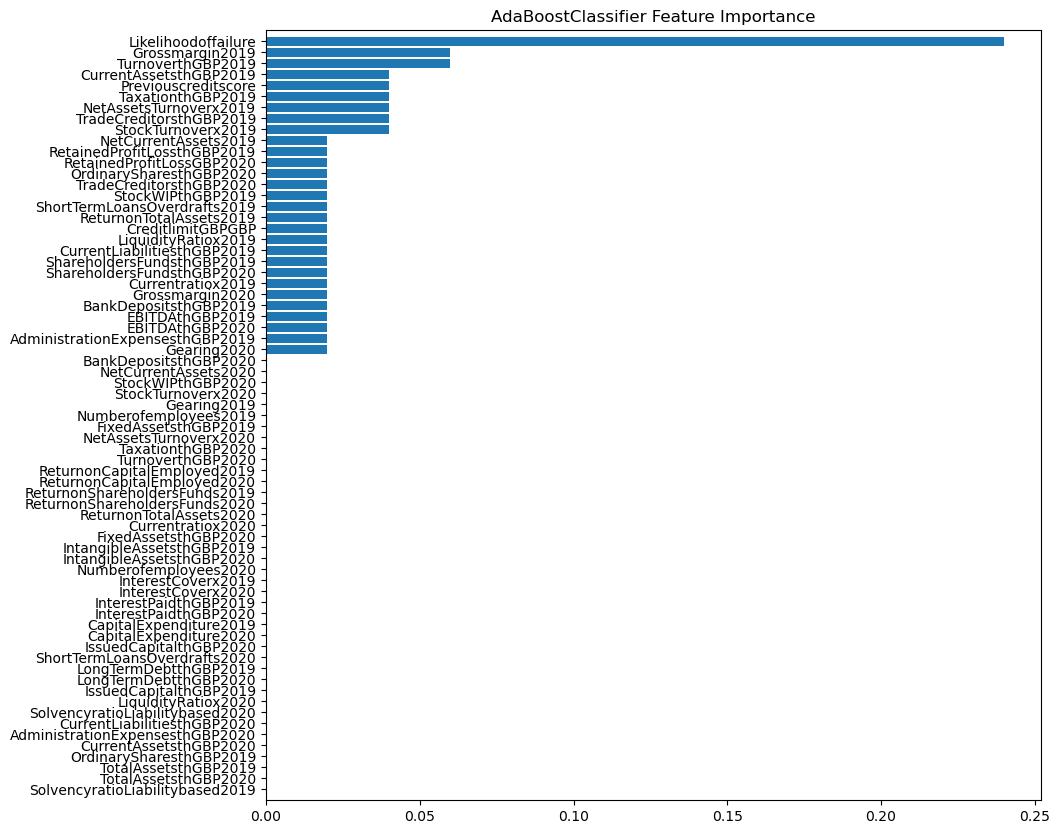

In [76]:
# Extract feature importance
feature_names = X_train.columns
importance = adaboost_clf.feature_importances_
indices = np.argsort(importance)
range1 = range(len(importance))

# Plot feature importance
plt.figure(figsize=(10, 10))
plt.title("AdaBoostClassifier Feature Importance")
plt.barh(range1, importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

###### 2. RandomForest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=123)  # Adjust n_estimators as needed

# Train Random Forest classifier
random_forest_clf.fit(X_train_scaled, Y_train)

# Predict using Random Forest classifier
random_forest_preds = random_forest_clf.predict(X_test_scaled)

# Evaluate Random Forest classifier
print("Accuracy of Random Forest classifier:", accuracy_score(Y_test, random_forest_preds))
print("Classification Report of Random Forest classifier:")
print(classification_report(Y_test, random_forest_preds))

Accuracy of Random Forest classifier: 0.9930697105584998
Classification Report of Random Forest classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



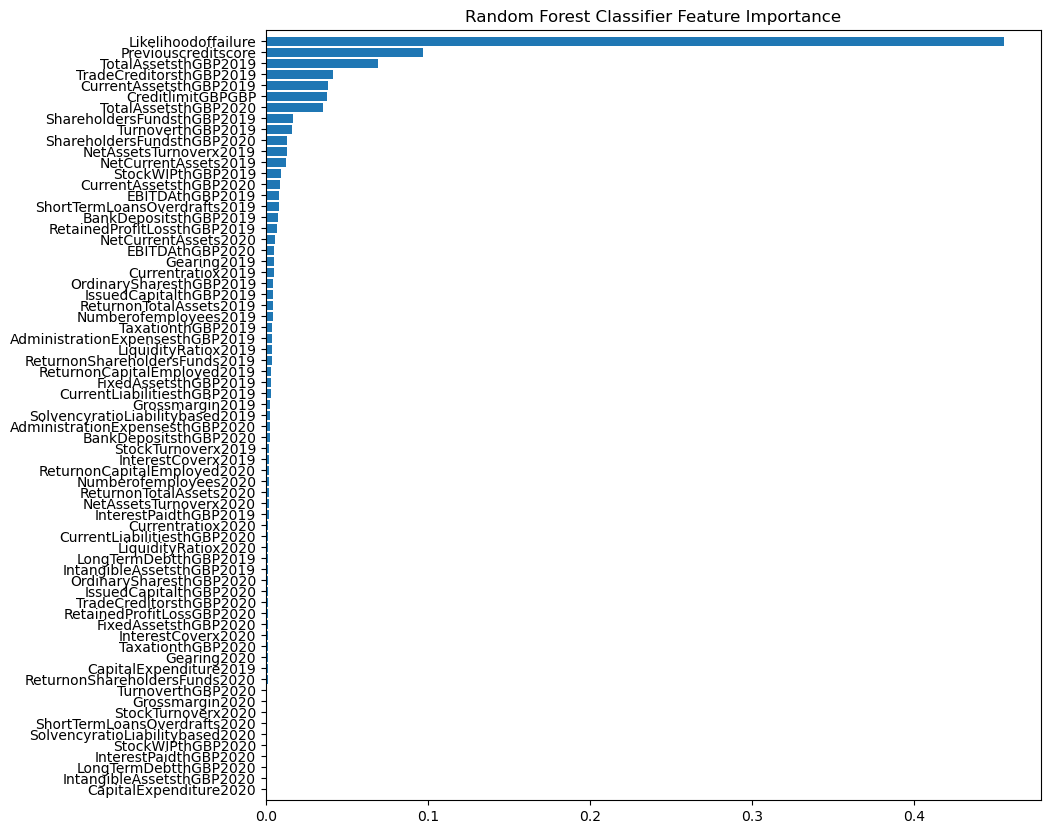

In [78]:
# Extract feature importance
importance_rf = random_forest_clf.feature_importances_
indices_rf = np.argsort(importance_rf)

# Plot feature importance
plt.figure(figsize=(10, 10))
plt.title("Random Forest Classifier Feature Importance")
plt.barh(range1, importance_rf[indices_rf])
plt.yticks(range1, feature_names[indices_rf])
plt.ylim([-1, len(range1)])
plt.show()

##### Support Vector Machine (SVM) Classification

In [79]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', random_state=123)

# Train SVM classifier
svm_clf.fit(X_train_scaled, Y_train)

# Predict using SVM classifier
svm_preds = svm_clf.predict(X_test_scaled)

# Evaluate SVM classifier
print("Accuracy of SVM classifier:", accuracy_score(Y_test, svm_preds))
print("Classification Report of SVM classifier:")
print(classification_report(Y_test, svm_preds))

Accuracy of SVM classifier: 0.9889930697105584
Classification Report of SVM classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



##### 4. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logreg_clf = LogisticRegression(random_state=123)

# Train Logistic Regression classifier
logreg_clf.fit(X_train_scaled, Y_train)

# Predict using Logistic Regression classifier
logreg_preds = logreg_clf.predict(X_test_scaled)

# Evaluate Logistic Regression classifier
print("Accuracy of Logistic Regression classifier:", accuracy_score(Y_test, logreg_preds))
print("Classification Report of Logistic Regression classifier:")
print(classification_report(Y_test, logreg_preds))

Accuracy of Logistic Regression classifier: 0.9894007337953526
Classification Report of Logistic Regression classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



#### Cross-Validation of AdaBoost and RandomForest Classifiers

In [81]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for AdaBoost classifier
adaboost_scores = cross_val_score(adaboost_clf, X_train_scaled, Y_train, cv=5)
adaboost_mean_accuracy = adaboost_scores.mean()
adaboost_std_accuracy = adaboost_scores.std()

print("Cross-validation scores for AdaBoost classifier:", adaboost_scores)
print("Mean accuracy of AdaBoost classifier:", adaboost_mean_accuracy)
print("Standard deviation of accuracy of AdaBoost classifier:", adaboost_std_accuracy)

Cross-validation scores for AdaBoost classifier: [0.98951965 0.99126638 0.9930131  0.98601399 0.99300699]
Mean accuracy of AdaBoost classifier: 0.9905640211317067
Standard deviation of accuracy of AdaBoost classifier: 0.0026173624897451817


In [82]:
# Perform cross-validation for Random Forest classifier
random_forest_scores = cross_val_score(random_forest_clf, X_train_scaled, Y_train, cv=5)
random_forest_mean_accuracy = random_forest_scores.mean()
random_forest_std_accuracy = random_forest_scores.std()

print("Cross-validation scores for Random Forest classifier:", random_forest_scores)
print("Mean accuracy of Random Forest classifier:", random_forest_mean_accuracy)
print("Standard deviation of accuracy of Random Forest classifier:", random_forest_std_accuracy)

Cross-validation scores for Random Forest classifier: [0.99126638 0.99475983 0.9930131  0.98863636 0.99388112]
Mean accuracy of Random Forest classifier: 0.9923113567655053
Standard deviation of accuracy of Random Forest classifier: 0.002170214543654544


Mean Absolute Error

In [83]:
from sklearn.metrics import mean_absolute_error

# Calculate mean absolute error for AdaBoost classifier
adaboost_mae = mean_absolute_error(Y_test, adaboost_preds)
print("Mean Absolute Error of AdaBoost classifier:", adaboost_mae)

# Calculate mean absolute error for Random Forest classifier
random_forest_mae = mean_absolute_error(Y_test, random_forest_preds)
print("Mean Absolute Error of Random Forest classifier:", random_forest_mae)

Mean Absolute Error of AdaBoost classifier: 0.0077456176110884635
Mean Absolute Error of Random Forest classifier: 0.006930289441500204


#### Predicting the target variable using RandomForestClassifier Method

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predict using Random Forest classifier
random_forest_preds = random_forest_clf.predict(X_test_scaled)

# Evaluate Random Forest classifier
print("Accuracy of Random Forest classifier:", accuracy_score(Y_test, random_forest_preds))
print("Classification Report of Random Forest classifier:")
print(classification_report(Y_test, random_forest_preds))

Accuracy of Random Forest classifier: 0.9930697105584998
Classification Report of Random Forest classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



###### Confusion Matrix

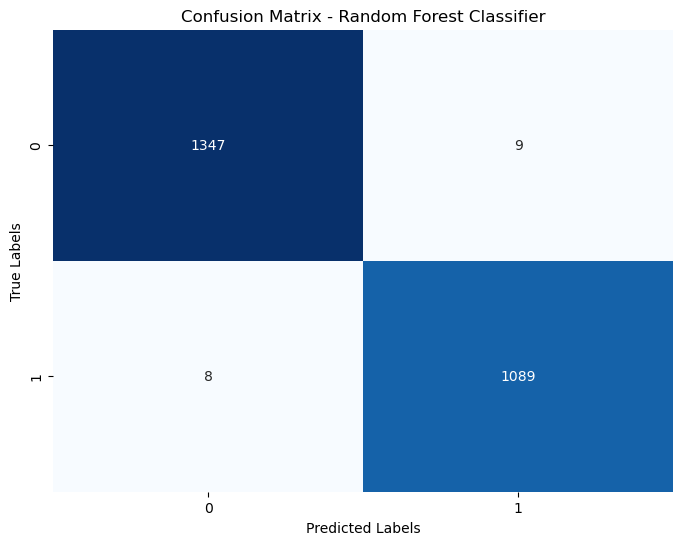

In [85]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, random_forest_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###### ROC Plot

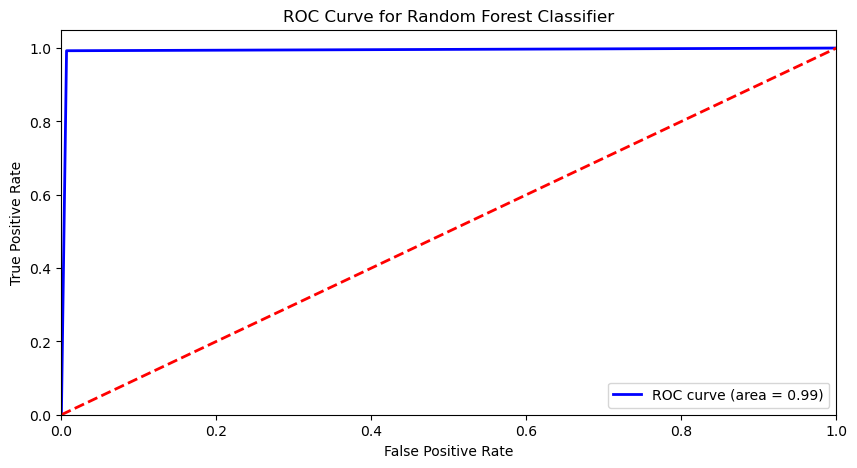

In [86]:
# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, random_forest_preds)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 5))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")